Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.0577
Epoch: 0002 Avg. cost = 0.0295
Epoch: 0003 Avg. cost = 0.0235
Epoch: 0004 Avg. cost = 0.0204
Epoch: 0005 Avg. cost = 0.0184
Epoch: 0006 Avg. cost = 0.0163
Epoch: 0007 Avg. cost = 0.0148
Epoch: 0008 Avg. cost = 0.0137
Epoch: 0009 Avg. cost = 0.0126
Epoch: 0010 Avg. cost = 0.0120
Epoch: 0011 Avg. cost = 0.0116
Epoch: 0012 Avg. cost = 0.0113
Epoch: 0013 Avg. cost = 0.0111
Epoch: 0014 Avg. cost = 0.0108
Epoch: 0015 Avg. cost = 0.0107
Epoch: 0016 Avg. cost = 0.0106
Epoch: 0017 Avg. cost = 0.0105
Epoch: 0018 Avg. cost = 0.0105
Epoch: 0019 Avg. cost = 0.0104
Epoch: 0020 Avg. cost = 0.0103
Epoch: 0021 Avg. cost = 0.0102
Epoch: 0022 Avg. cost = 0.0101
Epoch: 0023 Avg. cost = 0.0101
Epoch: 0024 Avg. cost = 0.0100
Epoch: 0025 Avg. cost = 0.0100
Epoch: 0026 Avg. cost =

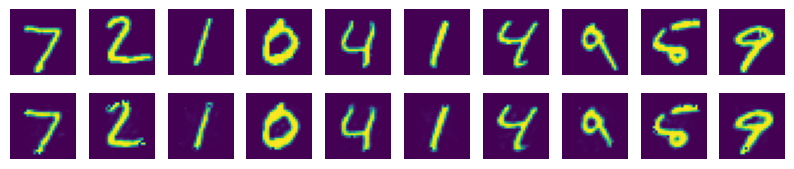

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

# 하이퍼파라메터 설정
learning_rate = 0.01
training_epoch = 100
batch_size = 100
n_hidden = 128
n_input = 28 * 28

# 신경망 구성을 위한 플레이스홀더 설정
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 생성
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

# 디코더 생성
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

# 손실 함수 및 최적화 함수 설정
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# 학습 진행
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))
    

print('최적화 완료!')

# 10개의 테스트 데이터 출력값 생성 by 디코더
sample_size = 10
samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

# 이미지로 출력
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
    
plt.show()